In [19]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.cm as cm

iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = iris.data
y = iris.target

### Using Elbow Method

In [6]:
#find optimum number of clusters
sse = []
 
for k in range(1, 11):
    km = KMeans(n_clusters= k, random_state= 2)
    km.fit(X)
    sse.append(km.inertia_)

##### Plot elbow graph to find optimum number of clusters

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

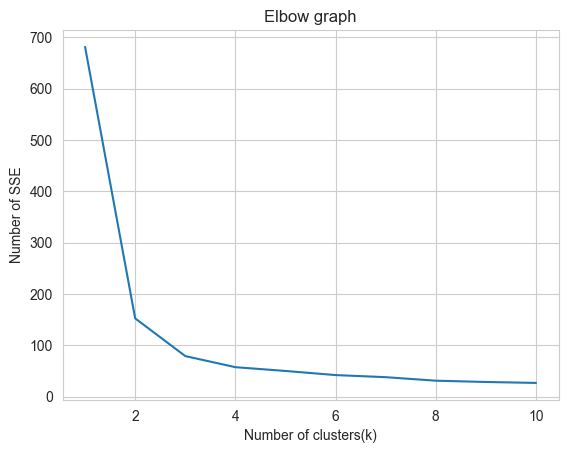

<Figure size 1000x500 with 0 Axes>

In [8]:
sns.set_style("whitegrid")

g = sns.lineplot(x = range(1,11), y = sse)
g.set(xlabel = "Number of clusters(k)",
      ylabel = "Number of SSE",
      title = "Elbow graph")

plt.figure(figsize=(10,5))
plt.show()


In [11]:
kmeans = KMeans(n_clusters=3, random_state= 2)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=2)

In [12]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [13]:
pred = kmeans.predict(X)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

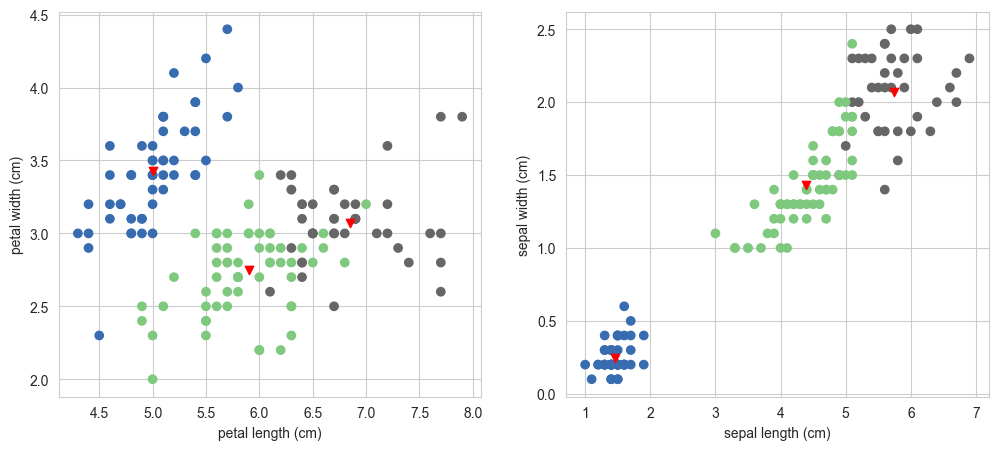

In [24]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c = pred, cmap= cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0], center[1], marker='v', c= 'red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.subplot(1,2,2)
plt.scatter(X[:,2], X[:,3], c = pred, cmap= cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[2:4]
    plt.scatter(center[0], center[1], marker= 'v', c= 'red')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()